<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/qo20b88v1hbjztubt06609ovs85q8fau.png" width="400px"  align="center"></a>
<h1 align="center"><font size="5">LOGISTIC REGRESSION WITH TENSORFLOW</font></h1>

# Autor: Mg. Rubén Quispe

## Table of Contents

Logistic Regression is one of most important techniques in data science. It is usually used to solve the classic classification problem.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>This lesson covers the following concepts of Logistics Regression:</strong></font>
<br>
<h2>Table of Contents</h2>

<ol>
    <li><a href="#ref1">Linear Regression vs Logistic Regression</a></li>
    <li><a href="#ref2">Utilizing Logistic Regression in TensorFlow</a></li>
    <li><a href="#ref3">Training</a></li>
</ol>    
</div>
<p></p>
<br>

<hr>

<a id="ref1"></a>
<h2>What is different between Linear and Logistic Regression?</h2>

Si bien la regresión lineal es adecuada para estimar valores continuos (por ejemplo, estimar el precio de la vivienda), no es la mejor herramienta para predecir la clase a la que pertenece un punto de datos observado. Para proporcionar una estimación de la clasificación, necesitamos algún tipo de orientación sobre cuál sería la clase más probable para ese punto de datos. Para esto, utilizamos la regresión logística.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size="3"><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, <i>y</i>, to some predictors (independent variables <i>x1</i>, <i>x2</i>, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 \times x1 + w2 \times x2 + \cdots
$$
<br>
and finds the values of <i>w0</i>, <i>w1</i>, <i>w2</i>, etc. The term <i>w0</i> is the "intercept" or "constant term" (it's shown as <i>b</i> in the formula below):
<br><br>
$$
Y = W X + b
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <i>y</i>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic <i>regression</i>, it is actually a <b>probabilistic classification</b> model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity $-\infty$) and 1 (as y approaches plus infinity $+\infty$). This now becomes a special kind of non-linear regression.

In this equation, <i>y</i> is the regression result (the sum of the variables weighted by the coefficients), <code>exp</code> is the exponential function and $\theta(y)$ is the <a href="http://en.wikipedia.org/wiki/Logistic_function">logistic function</a>, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-y}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid function but then treats the result as a probability:

<img src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


-------------------------------

<a id="ref2"></a>
<h2>Utilizing Logistic Regression in TensorFlow</h2>

For us to utilize Logistic Regression in TensorFlow, we first need to import the required libraries. To do so, you can run the code cell below.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

A continuación, cargaremos el conjunto de datos que vamos a usar. En este caso, estamos utilizando el conjunto de datos del iris, que está incorporado, por lo que no es necesario realizar ningún preprocesamiento y podemos comenzar a manipularlo. Separamos el conjunto de datos en xs e ys, y luego en entrenamiento xs e ys y prueba xs e ys, (pseudo) al azar.

<h3>Understanding the Data</h3>

Este conjunto de datos fue introducido por el estadístico y biólogo británico Ronald Fisher, y consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). En total tiene 150 registros bajo cinco atributos: longitud del pétalo, ancho del pétalo, longitud del sépalo, ancho del sépalo y especies. <a href="https://archive.ics.uci.edu/ml/datasets/iris">Dataset source</a>

Attributes
Independent Variable
<ul>
    <li>petal length</li>
    <li>petal width</li>
    <li>sepal length</li>
    <li>sepal width</li>
</ul>
Dependent Variable
<ul>    
    <li>Species
        <ul>
            <li>Iris setosa</li>
            <li>Iris virginica</li>
            <li>Iris versicolor</li>
        </ul>
    </li>
</ul>
<br>

In [3]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

Ahora definimos x e y. Estos placeholders mantendrán nuestros datos de iris (tanto las características como las matrices de etiquetas) y ayudarán a pasarlos a diferentes partes del algoritmo. Puede considerar los placeholders como shells vacíos en los que insertamos nuestros datos. También debemos darles formas que correspondan a la forma de nuestros datos. Más tarde, insertaremos datos en estos placeholders "alimentando" a los placeholders con los datos a través de un "feed_dict" (Feed Dictionary)
<h3>Why use Placeholders?</h3>

1. Esta característica de TensorFlow nos permite crear un algoritmo que acepta datos y sabe algo sobre la forma de los datos sin saber la cantidad de datos que ingresan.
2. Cuando insertamos "lotes o batches" de datos en el entrenamiento, podemos ajustar fácilmente cuántos ejemplos entrenamos en un solo paso sin cambiar todo el algoritmo.

In [4]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

Al igual que la regresión lineal, necesitamos una matriz de peso variable compartida para la regresión logística. Inicializamos tanto W como b como tensores llenos de ceros. Como vamos a aprender W y b, su valor inicial no importa demasiado. Estas variables son los objetos que definen la estructura de nuestro modelo de regresión, y podemos guardarlas después de haberlas entrenado para poder reutilizarlas más tarde.

Definimos dos variables TensorFlow como nuestros parámetros. Estas variables mantendrán los pesos y sesgos de nuestra regresión logística y se actualizarán continuamente durante el entrenamiento.

Observe que W tiene una forma de [4, 3] porque queremos multiplicar los vectores de entrada de 4 dimensiones para producir vectores de evidencia de 3 dimensiones para las clases de diferencia. b tiene una forma de [3] para que podamos agregarlo a la salida. Además, a diferencia de nuestros marcadores de posición anteriores, que son esencialmente cascarones vacíos que esperan recibir datos, las variables TensorFlow deben inicializarse con valores, por ejemplo con ceros

In [5]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [7]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

<h3>Logistic Regression model</h3>

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$$
ŷ =sigmoid(WX+b)
$$

Sin embargo, en aras de la claridad, podemos dividirlo en sus tres componentes principales:

- un peso multiplicado por la operación de multiplicación de matrices,
- una suma de las características ponderadas y un término de sesgo,
- y finalmente la aplicación de una función sigmoide.

As such, you will find these components defined as three separate operations below.


In [8]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

As we have seen before, the function we are going to use is the <i>logistic function</i> $(\frac{1}{1+e^{-Wx}})$, which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the <code>nn.sigmoid</code> function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.

<hr>

<a id="ref3"></a>
<h2>Training</h2>

The learning algorithm is how we search for the best weight vector (${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

<b>What tell us our model is bad?</b>  
The Cost or Loss of the model, so what we want is to minimize that. 

<b>What is the cost function in our model?</b>  
The cost function we are going to utilize is the Squared Mean Error loss function.

<b>How to minimize the cost function?</b>   
We can't use <b>least-squares linear regression</b> here, so we will use <a href="http://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a> instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.

<h3>Cost function</h3>
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.

In [11]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [12]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

Now we move on to actually running our operations. We will start with the operations involved in the prediction phase (i.e. the logistic regression itself).

First, we need to initialize our weights and biases with zeros or random values via the inbuilt Initialization Op, <b>tf.initialize_all_variables()</b>. This Initialization Op will become a node in our computational graph, and when we put the graph into a session, then the Op will run and create the variables.

In [13]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

We also want some additional operations to keep track of our model's efficiency over time. We can do this like so:

In [14]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

Now we can define and run the actual training loop, like this:

In [15]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 34.4294, change in cost 34.4294
step 10, training accuracy 0.535354, cost 30.1181, change in cost 4.31132
step 20, training accuracy 0.646465, cost 28.1692, change in cost 1.94893
step 30, training accuracy 0.646465, cost 26.5228, change in cost 1.64634
step 40, training accuracy 0.646465, cost 25.1542, change in cost 1.36862
step 50, training accuracy 0.646465, cost 24.0233, change in cost 1.1309
step 60, training accuracy 0.646465, cost 23.0873, change in cost 0.936064
step 70, training accuracy 0.646465, cost 22.3076, change in cost 0.779705
step 80, training accuracy 0.646465, cost 21.6524, change in cost 0.65519
step 90, training accuracy 0.646465, cost 21.0964, change in cost 0.556002
step 100, training accuracy 0.666667, cost 20.6197, change in cost 0.47662
step 110, training accuracy 0.666667, cost 20.2071, change in cost 0.412643
step 120, training accuracy 0.666667, cost 19.8464, change in cost 0.360659
step 130, training accuracy 0.66

<b>Why don't we plot the cost to see how it behaves?</b>

C:\Users\RUBEN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\RUBEN\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


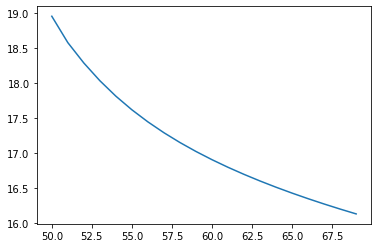

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

Assuming no parameters were changed, you should reach a peak accuracy of 90% at the end of training, which is commendable. Try changing the parameters such as the length of training, and maybe some operations to see how the model behaves. Does it take much longer? How is the performance?

<hr>

## Want to learn more?

Running deep learning programs usually needs a high performance platform. __PowerAI__ speeds up deep learning and AI. Built on IBM’s Power Systems, __PowerAI__ is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The __PowerAI__ platform supports popular machine learning libraries and dependencies including TensorFlow, Caffe, Torch, and Theano. You can use [PowerAI on IMB Cloud](https://cocl.us/ML0120EN_PAI).

Also, you can use __Watson Studio__ to run these notebooks faster with bigger datasets.__Watson Studio__ is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, __Watson Studio__ enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of __Watson Studio__ users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this lesson!

This is the end of **Logistic Regression with TensorFlow** notebook. Hopefully, now you have a deeper understanding of Logistic Regression and how its structure and flow work. Thank you for reading this notebook and good luck on your studies.

Created by: <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121">Saeed Aghabozorgi</a> , <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121">Walter Gomes de Amorim Junior</a> ,  Victor Barros Costa


<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).